In [58]:
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline

In [59]:
sleep_hours = pd.read_csv('sleep4.csv')
sleep_hours.columns

Index(['Stress', 'Physical_activity', 'recreational_activity',
       'Meditation_minutes', 'noise', 'light', 'wearning_socks', 'calories',
       'sleeping_hours'],
      dtype='object')

In [60]:
sleep_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Stress                 199 non-null    float64
 1   Physical_activity      199 non-null    object 
 2   recreational_activity  199 non-null    object 
 3   Meditation_minutes     199 non-null    int64  
 4   noise                  199 non-null    int64  
 5   light                  199 non-null    object 
 6   wearning_socks         199 non-null    object 
 7   calories               199 non-null    int64  
 8   sleeping_hours         199 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 14.1+ KB


In [61]:
sleep_hours.head()

,Stress,Physical_activity,recreational_activity,Meditation_minutes,noise,light,wearning_socks,calories,sleeping_hours
0,12.32,yoga,writing,6,0,on,no,1600,19.6
1,30.23,yoga,audio books,8,0,on,no,1800,7.6
2,34.26,none,audio books,6,0,on,yes,1999,4.4
3,14.78,yoga,audio books,8,0,off,yes,2000,10.5
4,20.20,yoga,audio books,5,0,off,no,2300,8.4


In [62]:
print(sleep_hours['Physical_activity'].unique())
Features = sleep_hours['Physical_activity']
enc = preprocessing.LabelEncoder()
enc.fit(Features)
Features = enc.transform(Features)
print(Features)

['yoga' 'none' 'running']
[2 2 0 2 2 1 0 1 2 2 1 0 1 1 0 2 1 0 1 2 0 1 1 2 0 2 2 2 0 2 0 2 1 1 0 0 0
 0 2 1 1 1 2 2 0 0 0 2 2 2 0 2 2 0 2 2 2 2 0 2 2 2 0 2 1 0 2 1 1 2 2 2 2 2
 0 0 2 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0 2 0 2 0 2 0 2 2 2 1 2 1 2 2 2 0 0 2 2
 2 1 2 1 2 2 1 2 1 1 1 2 1 1 0 1 1 1 2 1 1 2 2 0 1 2 1 1 2 1 1 2 1 0 1 1 0
 2 1 1 2 1 1 2 2 1 1 1 0 2 1 1 2 0 1 2 1 1 2 0 2 1 0 2 1 0 2 1 2 1 0 0 2 1
 1 0 0 0 1 2 0 1 0 2 1 1 2 1]


In [63]:
ohe = preprocessing.OneHotEncoder()
encoded = ohe.fit(Features.reshape(-1,1))
Features = encoded.transform(Features.reshape(-1,1)).toarray()
Features[:10,:]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [64]:
def encode_string(cat_feature):
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_feature)
    enc_cat_feature = enc.transform(cat_feature)
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_feature.reshape(-1,1))
    return encoded.transform(enc_cat_feature.reshape(-1,1)).toarray()
    

categorical_columns = ['recreational_activity', 'light', 'wearning_socks']

for col in categorical_columns:
    temp = encode_string(sleep_hours[col])
    Features = np.concatenate([Features, temp], axis = 1)

print(Features.shape)
print(Features[:2, :])   

(199, 10)
[[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
 [0. 0. 1. 1. 0. 0. 0. 1. 1. 0.]]


In [65]:
Features = np.concatenate([Features, np.array(sleep_hours[['Stress', 'Meditation_minutes', 'calories']])], axis = 1)
Features[:2,:]

array([[0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.232e+01, 6.000e+00,
        1.600e+03],
       [0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 3.023e+01, 8.000e+00,
        1.800e+03]])

In [66]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
labels = np.array(sleep_hours['sleeping_hours'])
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 40)
x_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [67]:
scaler = preprocessing.StandardScaler().fit(x_train[:,10:])
x_train[:,10:] = scaler.transform(x_train[:,10:])
x_test[:,10:] = scaler.transform(x_test[:,10:])
print(x_train.shape)
x_train[:4,:]

(159, 13)


array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  1.        ,  1.        ,  0.        ,
        -1.9845591 , -1.1873995 , -1.21373446],
       [ 0.        ,  0.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        -0.58342434,  1.46340968,  0.02843529],
       [ 1.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ,  0.        ,  1.        ,  0.        ,
         1.60982552,  1.46340968,  0.13582749],
       [ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  0.        ,  1.        ,  0.        ,
        -1.21841498,  1.46340968,  1.29208349]])

In [69]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(x_train, y_train)

LinearRegression(fit_intercept=False)

In [70]:
print(lin_mod.intercept_)
print(lin_mod.coef_)

0.0
[ 1.36500248  1.4294042   1.49091459  1.66108151  1.28962974  1.33461003
  1.83478672  2.45053455  2.29446706  1.99085421 -2.15944121  0.00442425
 -0.08640689]


In [71]:
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(x_test) 
print_metrics(y_test, y_score, 28)    

Mean Square Error      = 1.310210508285405
Root Mean Square Error = 1.144644271503337
Mean Absolute Error    = 0.8777352222300288
Median Absolute Error  = 0.6631218674737953
R^2                    = 0.7479028170873447
Adjusted R^2           = 0.1806841555338704


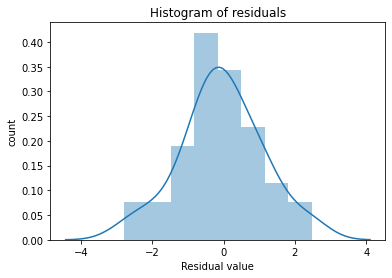

In [72]:
def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    
hist_resids(y_test, y_score)    

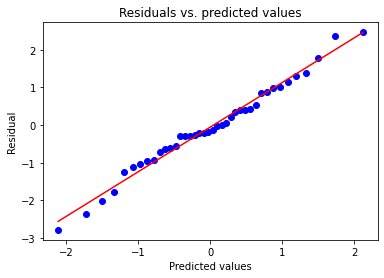

In [73]:
def resid_qq(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    ss.probplot(resids.flatten(), plot = plt)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')
    
resid_qq(y_test, y_score)   

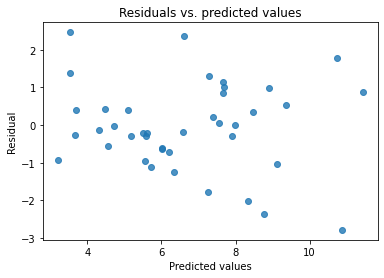

In [74]:
def resid_plot(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    sns.regplot(y_score, resids, fit_reg=False)
    plt.title('Residuals vs. predicted values')
    plt.xlabel('Predicted values')
    plt.ylabel('Residual')

resid_plot(y_test, y_score) 

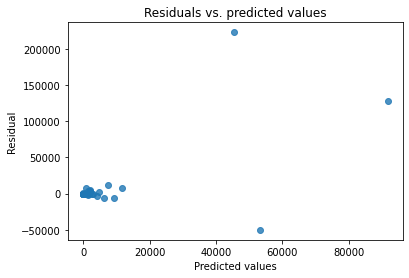

In [75]:
y_score_untransform = np.exp(y_score)
y_test_untransform = np.exp(y_test)
resid_plot(y_test_untransform, y_score_untransform) 